In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from pandas import DataFrame
from collections import Counter
%matplotlib inline
import os

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, MaxPooling2D, AveragePooling2D, Conv2D, Dropout, BatchNormalization, GlobalMaxPooling2D, Flatten
from sklearn.metrics import classification_report

In [2]:
img_input = tf.keras.Input(shape=(128, 128, 3))
x = tf.keras.layers.Conv2D(32, (5, 5), padding='SAME', activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Flatten()(x)
# x=tf.keras.layers.Dense(128,activation='relu')(x)
# x=tf.keras.layers.Dense(1,activation='sigmoid')(x)

crowd_prediction = tf.keras.layers.Dense(1, activation='sigmoid', name='crowd')(x)
coeff_prediction = tf.keras.layers.Dense(1, name='coeff')(x)

model = tf.keras.Model(img_input, [crowd_prediction, coeff_prediction])

model.compile(optimizer='SGD',
              loss=['binary_crossentropy', 'mae'],
              metrics=['accuracy', 'mae'])

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 2432        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 64)   18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [4]:
IMG_WIDTH=128
IMG_HEIGHT=128
img_folder='Newfolder/hasil'

In [6]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [9]:
# extract the image array and class name
img_data, class_name =create_dataset(img_folder)

In [9]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("Newfolder/hasil", output="Newfolder/hasil2", seed=1337, ratio=(.8, .1, .1), group_prefix=None) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# splitfolders.fixed("Newfolder/hasil", output="Newfolder/hasil2", seed=1337, fixed=(1981, 1981), oversample=True, group_prefix=None) # default values






Copying files: 0 files [00:00, ? files/s]



Copying files: 1 files [00:00,  4.45 files/s]



Copying files: 17 files [00:00,  6.27 files/s]



Copying files: 37 files [00:00,  8.84 files/s]



Copying files: 51 files [00:00, 12.28 files/s]



Copying files: 62 files [00:00, 16.71 files/s]



Copying files: 79 files [00:00, 22.90 files/s]



Copying files: 94 files [00:00, 30.64 files/s]



Copying files: 110 files [00:00, 40.16 files/s]



Copying files: 124 files [00:01, 47.51 files/s]



Copying files: 136 files [00:01, 57.18 files/s]



Copying files: 148 files [00:01, 67.10 files/s]



Copying files: 161 files [00:01, 78.01 files/s]



Copying files: 175 files [00:01, 88.70 files/s]



Copying files: 189 files [00:01, 98.41 files/s]



Copying files: 206 files [00:01, 111.44 files/s]



Copying files: 221 files [00:01, 120.32 files/s]



Copying files: 235 files [00:01, 117.14 files/s]



Copying files: 249 files [00:02, 113.92 files/s]



Copying files: 262 files [00:02, 114.

Copying files: 2839 files [00:49, 50.13 files/s]



Copying files: 2848 files [00:49, 56.17 files/s]



Copying files: 2859 files [00:50, 64.53 files/s]



Copying files: 2869 files [00:50, 70.64 files/s]



Copying files: 2880 files [00:50, 77.26 files/s]



Copying files: 2890 files [00:50, 63.46 files/s]



Copying files: 2898 files [00:51, 27.64 files/s]



Copying files: 2904 files [00:51, 28.72 files/s]



Copying files: 2909 files [00:51, 25.22 files/s]



Copying files: 2918 files [00:51, 31.42 files/s]



Copying files: 2925 files [00:51, 36.92 files/s]



Copying files: 2931 files [00:52, 16.95 files/s]



Copying files: 2944 files [00:52, 22.91 files/s]



Copying files: 2960 files [00:52, 30.83 files/s]



Copying files: 2973 files [00:52, 39.92 files/s]



Copying files: 2986 files [00:53, 50.14 files/s]



Copying files: 3001 files [00:53, 62.53 files/s]



Copying files: 3014 files [00:53, 73.75 files/s]



Copying files: 3027 files [00:53, 67.13 files/s]



Copying file

Copying files: 5767 files [01:39, 117.11 files/s]



Copying files: 5780 files [01:39, 116.26 files/s]



Copying files: 5793 files [01:39, 113.87 files/s]



Copying files: 5808 files [01:39, 122.29 files/s]



Copying files: 5821 files [01:39, 108.00 files/s]



Copying files: 5833 files [01:40, 52.07 files/s] 



Copying files: 5842 files [01:41, 20.86 files/s]



Copying files: 5849 files [01:44,  6.39 files/s]



Copying files: 5855 files [01:44,  8.59 files/s]



Copying files: 5861 files [01:44, 11.47 files/s]



Copying files: 5866 files [01:44, 14.61 files/s]



Copying files: 5874 files [01:44, 19.24 files/s]



Copying files: 5880 files [01:44, 23.56 files/s]



Copying files: 5888 files [01:44, 29.48 files/s]



Copying files: 5898 files [01:44, 37.09 files/s]



Copying files: 5911 files [01:45, 46.73 files/s]



Copying files: 5924 files [01:45, 57.21 files/s]



Copying files: 5936 files [01:45, 66.81 files/s]



Copying files: 5946 files [01:45, 62.34 files/s]



Copyin

In [10]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

{'crowd': 0, 'noncrowd': 1}

In [11]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
history = model.fit(x=tf.cast(np.array(img_data), tf.float64), y=tf.cast(list(map(int,target_val)),tf.int32), epochs=10)

Epoch 1/10
203/203 [==============================] - 194s 928ms/step - loss: 1.2717 - crowd_loss: 0.6782 - coeff_loss: 0.5936 - crowd_accuracy: 0.6010 - crowd_mae: 0.4862 - coeff_accuracy: 0.4524 - coeff_mae: 0.5936
Epoch 2/10
203/203 [==============================] - 162s 800ms/step - loss: 1.1041 - crowd_loss: 0.6485 - coeff_loss: 0.4556 - crowd_accuracy: 0.6270 - crowd_mae: 0.4585 - coeff_accuracy: 0.5807 - coeff_mae: 0.4556
Epoch 3/10
203/203 [==============================] - 163s 802ms/step - loss: 1.0830 - crowd_loss: 0.6508 - coeff_loss: 0.4323 - crowd_accuracy: 0.6034 - crowd_mae: 0.4631 - coeff_accuracy: 0.6087 - coeff_mae: 0.4323
Epoch 4/10
203/203 [==============================] - 166s 815ms/step - loss: 1.0676 - crowd_loss: 0.6463 - coeff_loss: 0.4213 - crowd_accuracy: 0.6149 - crowd_mae: 0.4572 - coeff_accuracy: 0.6124 - coeff_mae: 0.4213
Epoch 5/10
203/203 [==============================] - 165s 812ms/step - loss: 1.0652 - crowd_loss: 0.6497 - coeff_loss: 0.4155 - cro

In [16]:
model.metrics_names

['loss',
 'crowd_loss',
 'coeff_loss',
 'crowd_accuracy',
 'crowd_mae',
 'coeff_accuracy',
 'coeff_mae']

In [ ]:
prediction = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,prediction))

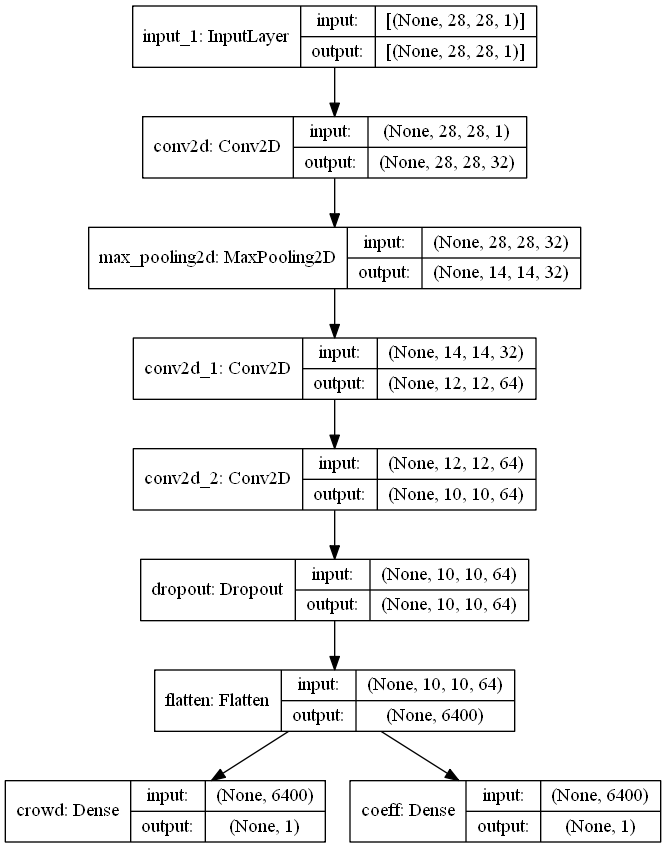

In [4]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)